In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt     
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from load_vectorize_data import *

c:\programdata\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Logistic Regression Model:

In [2]:
def train_ngram_model_Regression(X_train, Y_train, X_test, Y_test):
    classifier = LogisticRegression()
    classifier.fit(X_train, Y_train)
    score_regression = classifier.score(X_test, Y_test)
    y_pred_regression = classifier.predict(X_test)
    return score_regression, y_pred_regression

In [3]:
X_train, Y_train, X_test, Y_test = ngram_vectorize_train()
score_regression, y_pred_regression = train_ngram_model_Regression(X_train, Y_train, X_test, Y_test)

C:\Users\kruti\Desktop\ADS Class\Assignment 4\Assignment_4\load_vectorize_data.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['lyrics'] = df1['lyrics'].apply(lambda x : x.lower())
C:\Users\kruti\Desktop\ADS Class\Assignment 4\Assignment_4\load_vectorize_data.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df2['lyrics'] = df2['lyrics'].apply(lambda y : y.lower())
c:\programdata\anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


c:\programdata\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Fully connected Keras Model:

In [4]:
def train_ngram_model(X_train, Y_train, X_test, Y_test):
    input_dim = X_train.shape[1]
    model_bow = Sequential()
    model_bow.add(Dense(32, input_dim=input_dim, activation='relu'))
    model_bow.add(Dropout(0.5))
    model_bow.add(Dense(units=32,activation='relu'))
    model_bow.add(Dropout(0.5))
    # activation of output is sigmoid
    model_bow.add(Dense(units=1, activation='sigmoid'))
    adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model_bow.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    model_bow.summary()
    
    history_bow = model_bow.fit(X_train, 
                                Y_train,
                                epochs=3,
                                verbose=2,
                                validation_data=(X_test, Y_test),
                                batch_size=10)
    score = model_bow.evaluate(X_test, Y_test, verbose=3)
    
    # list all data in history
    print(history_bow.history.keys())
    # summarize history for accuracy
    plt.plot(history_bow.history['acc'])
    plt.plot(history_bow.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history_bow.history['loss'])
    plt.plot(history_bow.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # Save model.
    model_bow.save('music_classification_model.h5')
    
    return model_bow
    print('Test Loss: ', score[0])
    print('Test Accuracy', score[1])

C:\Users\kruti\Desktop\ADS Class\Assignment 4\Assignment_4\load_vectorize_data.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['lyrics'] = df1['lyrics'].apply(lambda x : x.lower())
C:\Users\kruti\Desktop\ADS Class\Assignment 4\Assignment_4\load_vectorize_data.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df2['lyrics'] = df2['lyrics'].apply(lambda y : y.lower())
c:\programdata\anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                412416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_______________________________________________________________

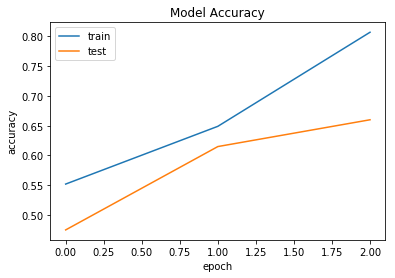

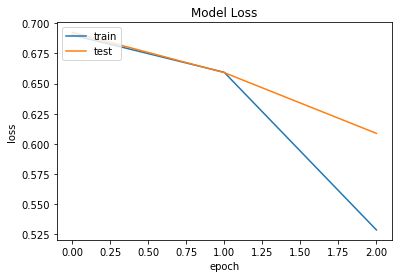

In [5]:
X_train, Y_train, X_test, Y_test = ngram_vectorize_train()
model_bow = train_ngram_model(X_train, Y_train, X_test, Y_test)